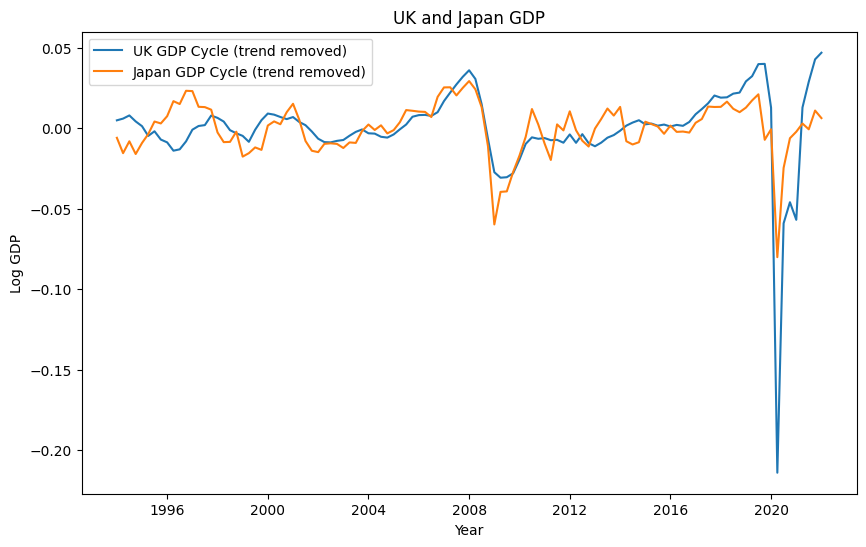

UK GDP standard deviation: 0.02662560102638362
Japan GDP standard deviation: 0.016100315126026648
Correlation coefficient between UK and Japan GDP: 0.6881103413028337


In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

UK_GDP_SYMBOL = 'NGDPRSAXDCGBQ'  
JP_GDP_SYMBOL = 'JPNRGDPEXP'  
start_date = '1994-01-01'
end_date = '2022-01-01'


uk_gdp = web.DataReader(UK_GDP_SYMBOL, 'fred', start_date, end_date)
log_uk_gdp = np.log(uk_gdp)
uk_cycle, _ = sm.tsa.filters.hpfilter(log_uk_gdp, lamb=1600)
uk_std = uk_cycle.std()

jp_gdp = web.DataReader(JP_GDP_SYMBOL, 'fred', start_date, end_date)
log_jp_gdp = np.log(jp_gdp)
jp_cycle, _ = sm.tsa.filters.hpfilter(log_jp_gdp, lamb=1600)
jp_std = jp_cycle.std()

correlation = np.corrcoef(uk_cycle, jp_cycle)[0, 1]


plt.figure(figsize=(10, 6))
plt.plot(log_uk_gdp.index, uk_cycle, label="UK GDP Cycle (trend removed)")
plt.plot(log_jp_gdp.index, jp_cycle, label="Japan GDP Cycle (trend removed)")
plt.legend()
plt.title("UK and Japan GDP")
plt.xlabel("Year")
plt.ylabel("Log GDP")
plt.show()


print("UK GDP standard deviation:", uk_std)
print("Japan GDP standard deviation:", jp_std)
print("Correlation coefficient between UK and Japan GDP:", correlation)


# 考察
# 標準偏差の比較から、イギリスは日本よりも実質GDP循環成分の変動が大きいことがわかる。
# しかしこれは必ずしも日本の経済環境がイギリスより優れているということを意味しない。むしろ、日本はバブル崩壊を迎えた９０年代初頭以降、
# 基本的に低成長の時代を過ごしてきたことから、低位安定の成長経路をたどってきたといえる。
# 相関係数は0.7弱であり、絶対的な水準でみればやや高いといえる。政治背景や文化を考えると、両国はともに西側陣営に位置する資本主義国家であり、
# また島国であり、保守的な傾向が高く、皇族が存在する議会制民主主義国家である。これらの要因が高い相関を生み出しているのかもしれない。
# 両国の実質GDP循環成分の時系列データを見ていく。
#　☆日本
#　① 1996年前後にlog gdpが上昇を見せたのち下降。②2000年前後にも同じような動き。以降緩やかな成長。③2008年に大きく下降。
#　④ その後小さく上下しながら2020年に再び大きく下降。これらの要因を考えていく。
#　日本銀行「1996年度の金融および経済の動向」のレポートによれば、①の時期には、金融、財政面で強力な景気刺激策がとられたのち、円高修正が加わり、
#　住宅投資や公共投資、純輸出の増加等、景気加速が進んだ。一方、97年4月の消費税増税を踏まえ、駆け込み需要が増大したことも加速要因として考えられ、
#　のちの需要を前借した結果のlog gdp上昇ともとらえることができる。97年末には金融機関の不良債権問題が顕在化し、11月には三洋証券、北海道拓殖銀行、山一證券が破綻、
#　log gdpも大きく下降している。②2000年前後には、いわゆるITバブルの発生と崩壊によって上下していると考えられる。
#　その後2002年から2008年まではいわゆるいざなみ景気の時期で、第十四循環ともいわれる緩やかな成長を遂げている。この時期日本銀行はゼロ金利政策
#　量的緩和等金融緩和姿勢を取り、財政ではりそな銀行への公的資金注入を行うなど、国を挙げてITバブルからの立ち直りと金融危機の回避を目指した。
#　③しかし2008年にはいわゆるリーマンショックによって、log gdpはイギリス以上に大きく低下している。アメリカやヨーロッパの景気後退は日本の輸出業にも打撃を与え、
#　さらにドルが不安視される中日本は実力以上の円高に苦しむこととなった。④アベノミクス開始等新たな時代を迎えると今度は2020年、コロナショックが発生した。
#　gdpは大きく下がったがイギリスほどではない。
#　バブル崩壊後、日本は失われたx十年の中にいるといわれるが、金融危機の97年までは、拡張的な金融財政政策によってそれなりにlog gdpが上向いていたことや、
#　200年代初頭からリーマンショックまでの長期にわたり、緩やかな景気拡張期を迎えていたことはポイントであると考えられる。
#　☆イギリス
#　1996年前後、日本で景気刺激策と円安のもとlog gdpが上昇したと考えられるが、イギリスは日本と逆の動きをしている。イギリスでは94年9月以降金融は引き締めの方向に進み
#　財政も引き締め基調であった（平成8年世界経済白書　内閣府）。しかし個人消費の堅調さが内需を支え、ドル高も相まって景気は徐々に拡大していった。
#　96年10月には利上げ。金融政策の効果に時差があることを考えると、おおむね政策と時系列データは双方向に整合的であるといえる。
#　その後は基本的に日本と同じような動きを見せている。グローバル化の進展で同盟国間の経済の相関は高まってきているのかもしれない。
#　リーマンショックやコロナショック等世界的な、大規模でのショックが頻発していることから、おおむね同じような変化を先進国が経験するのは納得できる。
#　コロナショックでは日本より大きなgdpの下降を経験している。
#　☆コロナショックについて
#　リーマンショックに反して、コロナショックでは日本はイギリスほどのショックを受けなかったことがわかる。NIRA総合研究開発機構（2021）はその理由として、
# ①日本が欧米諸国ほどの思い切ったロックダウンを行わなかったこと（厳格度の低さ）、②最終消費支出の変化が小さかったこと（イギリスは先進国の中でも最大の落ち込み）
# ③感染者数や死亡者数の少なさ、等をあげている。（https://nira.or.jp/paper/opinion-paper/2021/57.html）


#考察 標準偏差の比較から、イギリスは日本よりも実質GDP循環成分の変動が大きいことがわかる。しかしこれは必ずしも日本の経済環境がイギリスより優れているということを意味しない。むしろ、日本はバブル崩壊を迎えた９０年代初頭以降、基本的に低成長の時代を過ごしてきたことから、低位安定の成長経路をたどってきたといえる。
相関係数は0.7弱であり、絶対的な水準でみればやや高いといえる。政治背景や文化を考えると、両国はともに西側陣営に位置する資本主義国家であり、また島国であり、保守的な傾向が高く、皇族が存在する議会制民主主義国家である。これらの要因が高い相関を生み出していると考えられる。
両国の実質GDP循環成分の時系列データを見ていく。
☆日本
①96年前後にlog gdpが上昇を見せたのち下降。②2000年前後にも同じような動き。以降緩やかな成長。③2008年に大きく下降。④その後小さく上下しながら2020年に再び大きく下降。これらの要因を考えていく。日本銀行「1996年度の金融および経済の動向」のレポートによれば、①の時期には、金融、財政面で強力な景気刺激策がとられたのち、円高修正が加わり、住宅投資や公共投資、純輸出の増加等、景気加速が進んだ。一方、97年4月の消費税増税を踏まえ、駆け込み需要が増大したことも加速要因として考えられ、のちの需要を前借した結果のlog gdp上昇ともとらえることができる。97年末には金融機関の不良債権問題が顕在化し、11月には三洋証券、北海道拓殖銀行、山一證券が破綻、log gdpも大きく下降している。②2000年前後には、いわゆるITバブルの発生と崩壊によって上下していると考えられる。その後2002年から2008年まではいわゆるいざなみ景気の時期で、第十四循環ともいわれる緩やかな成長を遂げている。この時期日本銀行はゼロ金利政策、量的緩和等金融緩和姿勢を取り、財政ではりそな銀行への公的資金注入を行うなど、国を挙げてITバブルからの立ち直りと、金融危機の回避を目指した。③しかし2008年にはいわゆるリーマンショックによって、log gdpはイギリス以上に大きく低下している。アメリカやヨーロッパの景気後退は日本の輸出業にも打撃を与え、さらにドルが不安視される中日本は実力以上の円高に苦しむこととなった。④アベノミクス開始等新たな時代を迎えると今度は2020年、コロナショックが発生した。gdpは大きく下がったがイギリスほどではない。
バブル崩壊後、日本は失われたx十年の中にいるといわれるが、金融危機の97年までは、拡張的な金融財政政策によってそれなりにlog gdpが上向いていたことや、200年代初頭からリーマンショックまでの長期にわたり、緩やかな景気拡張期を迎えていたことはポイントであると考えられる。
☆イギリス
96年前後、日本で景気刺激策と円安のもとlog gdpが上昇したと考えられるが、イギリスは日本と逆の動きをしている。イギリスでは94年9月以降金融は引き締めの方向に進み、財政も引き締め基調であった（平成8年世界経済白書　内閣府）。しかし個人消費の堅調さが内需を支え、ドル高も相まって景気は徐々に拡大していった。96年10月には利上げ。金融政策の効果に時差があることを考えると、おおむね政策と時系列データは双方向に整合的であるといえる。その後は基本的に日本と同じような動きを見せている。グローバル化の進展で同盟国間の経済の相関は高まってきているのかもしれない。リーマンショックやコロナショック等世界的な、大規模でのショックが頻発していることから、おおむね同じような変化を先進国が経験するのは納得できる。コロナショックでは日本より大きなgdpの加工を経験している。
☆コロナショックについて
リーマンショックに反して、コロナショックでは日本はイギリスほどのショックを受けなかったことがわかる。NIRA総合研究開発機構（2021）はその理由として、①日本が欧米諸国ほどの思い切ったロックダウンを行わなかったこと（厳格度の低さ）、②最終消費支出の変化が小さかったこと（イギリスは先進国の中でも最大の落ち込み）③感染者数や死亡者数の少なさ、等をあげている。（https://nira.or.jp/paper/opinion-paper/2021/57.html）